In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
from mylib.adalinesgd import AdalineSGD

In [2]:
style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

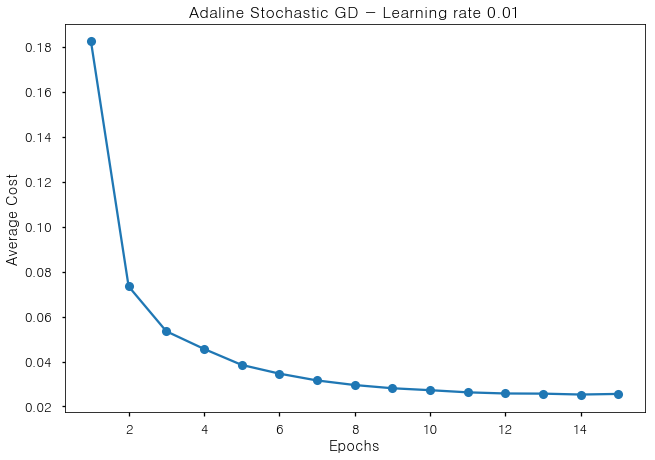

In [8]:
if __name__ == '__main__':
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    y = df.iloc[0:100, 4].values
    y = np.where(y=='Iris-setosa', -1, 1)
    X = df.iloc[0:100, [0, 2]].values
    
    # X를 X_std에 하나 복사
    # X_std = X 와 무엇이 다르지?
    X_std = np.copy(X)

    # 표준화(standardization)
    X_std[:,0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:,1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    
    adal = AdalineSGD(eta=0.01, n_iter=15, random_state=1).fit(X_std, y)
    plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Average Cost')
    plt.title('Adaline Stochastic GD - Learning rate 0.01')
    plt.show()